# Dataset Description

- Name of the dataset: Exam Scores Dataset at a public school.
- Dataset link: https://www.kaggle.com/datasets/desalegngeb/students-exam-scores
- Dataset download: https://www.kaggle.com/datasets/desalegngeb/students-exam-scores?select=Expanded_data_with_more_features.csv#:~:text=calendar_view_week-,Expanded_data_with_more_features,-.csv
- License of the dataset: Kaggle is a public competition website, which means everyone can use it.
- Size: 3 MB


## Data dictionary: 

- Gender: Gender of the student (male/female)
- EthnicGroup: Ethnic group of the student (group A to E)
- ParentEduc: Parent(s) education background (from some_highschool to master's degree)
- LunchType: School lunch type (standard or free/reduced)
- TestPrep: Test preparation course followed (completed or none)
- ParentMaritalStatus: Parent(s) marital status (married/single/widowed/divorced)
- PracticeSport: How often the student parctice sport (never/sometimes/regularly))
- IsFirstChild: If the child is first child in the family or not (yes/no)
- NrSiblings: Number of siblings the student has (0 to 7)
- TransportMeans: Means of transport to school (schoolbus/private)
- WklyStudyHours: Weekly self-study hours(less that 5hrs; between 5 and 10hrs; more than 10hrs)
- MathScore: math test score(0-100)
- ReadingScore: reading test score(0-100)
- WritingScore: writing test score(0-100)

Most of the data types are strings and the Scores are numeric.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("student_score.csv")
df = df.drop("Unnamed: 0", axis =1)
print(df.head())

# Chart 1: Child Score's relativeness with Parents' education

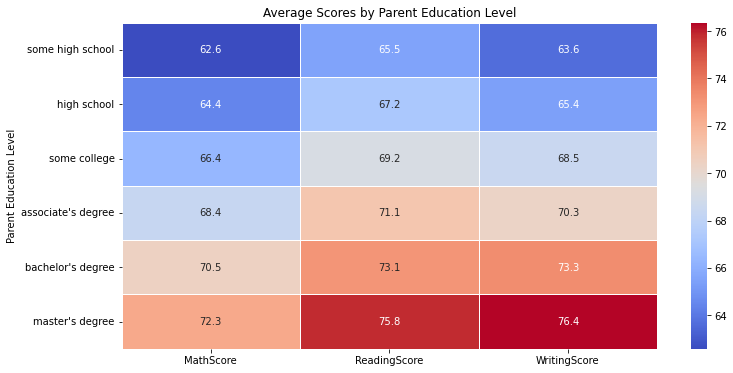

In [3]:
# Sorting education levels
education_order = [
    "some high school",
    "high school",
    "some college",
    "associate's degree",
    "bachelor's degree",
    "master's degree"
]

df['ParentEduc'] = pd.Categorical(df['ParentEduc'], categories=education_order, ordered=True)

# Group by Parent Education and calculate mean scores
score_means = df.groupby('ParentEduc')[['MathScore', 'ReadingScore', 'WritingScore']].mean()

# Create the heatmap to see the relationship
plt.figure(figsize=(12, 6))
sns.heatmap(score_means, annot=True, fmt=".1f", cmap='coolwarm', linewidths=.5)
plt.title('Average Scores by Parent Education Level')
plt.ylabel('Parent Education Level')
plt.show()

# we can see a positive relationship between parent's education level and their child's score.

# Chart 2: Weekly Study Hour & Practice Sport Frequency's influence on Scores.

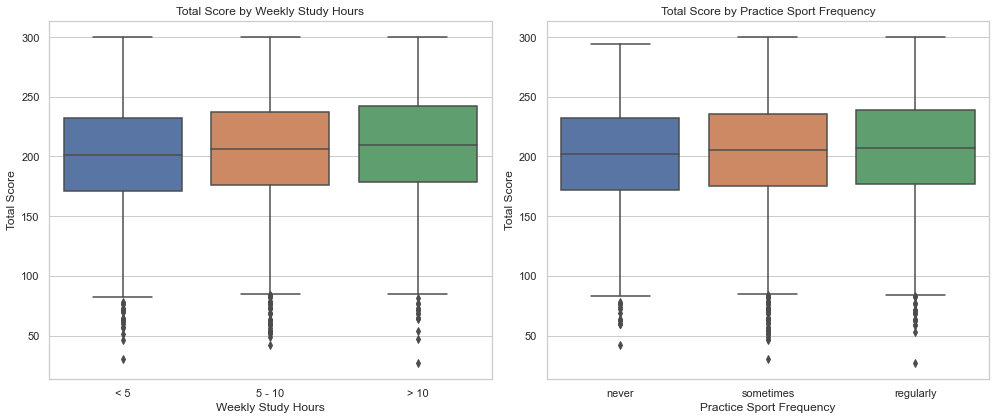

In [19]:
df['TotalScore'] = df['MathScore'] + df['ReadingScore'] + df['WritingScore']
data_no_nulls = df.dropna()
sns.set(style="whitegrid")

# Creating a figure to host the plots
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plotting the relationship between Weekly Study Hours and Total Score
sns.boxplot(data=data_no_nulls, x='WklyStudyHours', y='TotalScore', ax=ax[0])
ax[0].set_title('Total Score by Weekly Study Hours')
ax[0].set_xlabel('Weekly Study Hours')
ax[0].set_ylabel('Total Score')

# Plotting the relationship between Practice Sport and Total Score
practice_order = ['never', 'sometimes', 'regularly']
sns.boxplot(data=data_no_nulls, x='PracticeSport', y='TotalScore', order = practice_order, ax=ax[1])
ax[1].set_title('Total Score by Practice Sport Frequency')
ax[1].set_xlabel('Practice Sport Frequency')
ax[1].set_ylabel('Total Score')

plt.tight_layout()
plt.show()

# From the average reference line and the Box plot, we can see more study hours and higher Practice Sport Frequency is relating to a higher score.

# Chart 3&4: Different Gender and Lunch type's score overlap graph

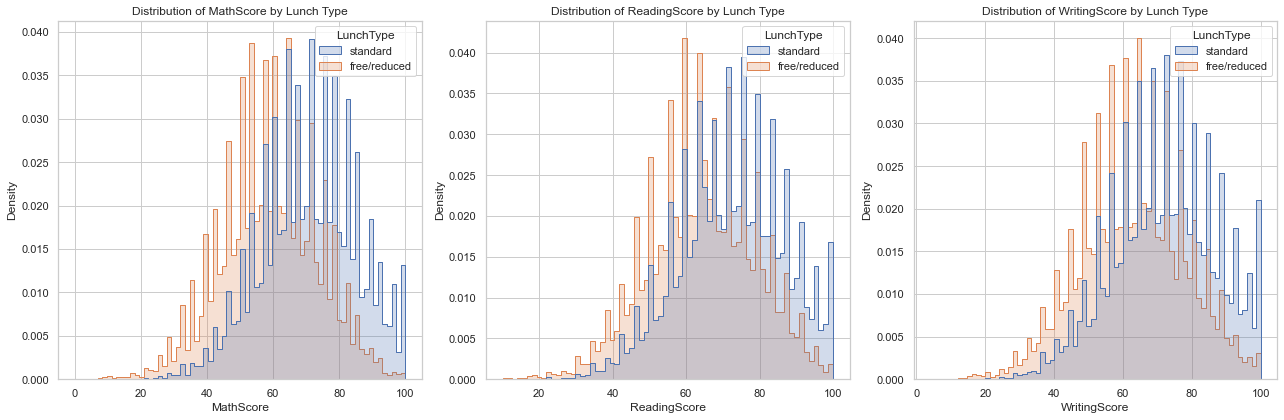

In [21]:
# We can see the score distribution of 2 different types of Lunch.
plt.figure(figsize=(18, 6))

# Create subplots for each score by lunch type
for i, score in enumerate(['MathScore', 'ReadingScore', 'WritingScore'], 1):
    plt.subplot(1, 3, i)
    sns.histplot(data=df, x=score, hue='LunchType', element='step', stat='density', common_norm=False)
    plt.title(f'Distribution of {score} by Lunch Type')

plt.tight_layout()
plt.show()

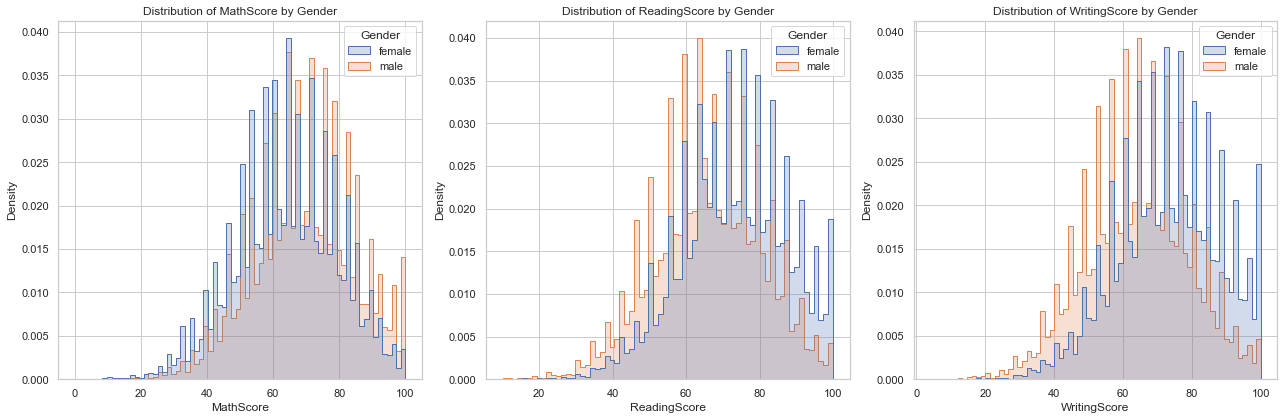

In [23]:
plt.figure(figsize=(18, 6))

# Create subplots for each score by gender
for i, score in enumerate(['MathScore', 'ReadingScore', 'WritingScore'], 1):
    plt.subplot(1, 3, i)
    sns.histplot(data=df, x=score, hue='Gender', element='step', stat='density', common_norm=False)
    plt.title(f'Distribution of {score} by Gender')

plt.tight_layout()
plt.show()